# Plotting Timeseries for E/W Transport files from Observational Data
*Akira Di Sandro, 6/24/20*
<br>
In this notebook, I will be plotting time series of transport across the  east and west sides of the Solomon Strait as well as a plot with both sides and the total transport on the same graph.

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [2]:
#!python
#!/usr/bin/env python
from scipy.io import loadmat
x = loadmat('allTransport_SolomonStrait.mat')
# one-liner to read a single variable
#lon = loadmat('test.mat')['lon']

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [3]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [4]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [5]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries

### a. Let's start with the eastern side of the Solomon Strait

In [14]:
x['flist'][18]

array([(array(['SolomonStrait_geoBotRef_westernXsection_linear2bot_sat4surf.mat'],
      dtype='<U63'), array(['/Users/marionsofiaalberty/MATLAB/Solomon_Sea/Moorings/Data/Gridded/SolomonStrait'],
      dtype='<U80'), array(['05-Nov-2018 14:25:43'], dtype='<U20'), array([[46006032]], dtype=int32), array([[0]], dtype=uint8), array([[737369.60119213]]))],
      dtype=[('name', 'O'), ('folder', 'O'), ('date', 'O'), ('bytes', 'O'), ('isdir', 'O'), ('datenum', 'O')])

I found the file that Marion sent me as the other data set so I'm going to use the Transport data that corresponds to this file for now.

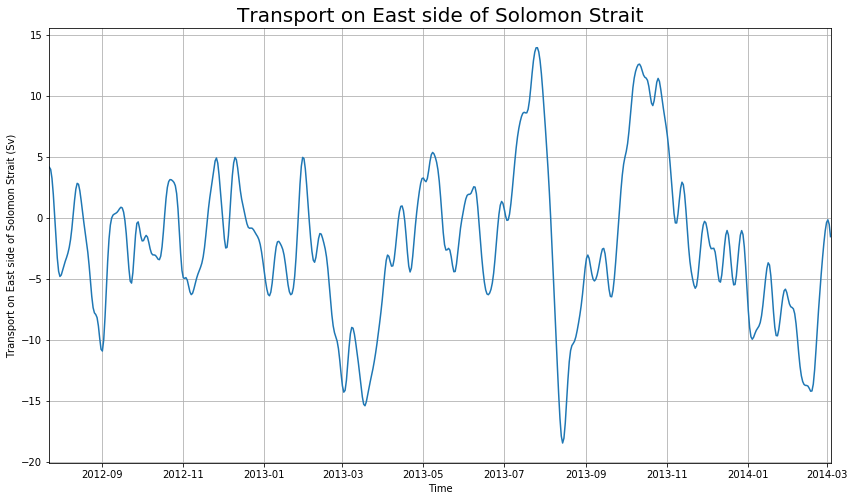

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport on East side of Solomon Strait (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, x['T_E'][42])
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
plt.title('Transport on East side of Solomon Strait', fontsize=20)
plt.show()

### b. western side of Solomon Strait

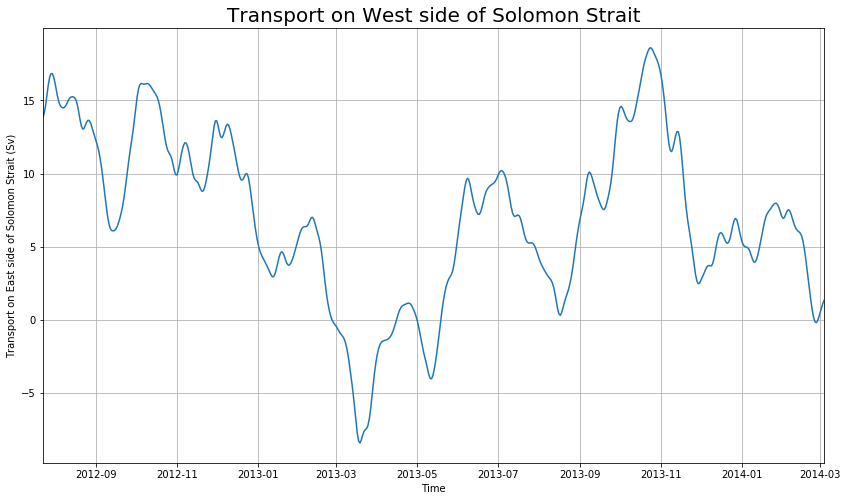

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport on East side of Solomon Strait (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, x['T_W'][42])
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
plt.title('Transport on West side of Solomon Strait', fontsize=20)
plt.show()

### c. Total

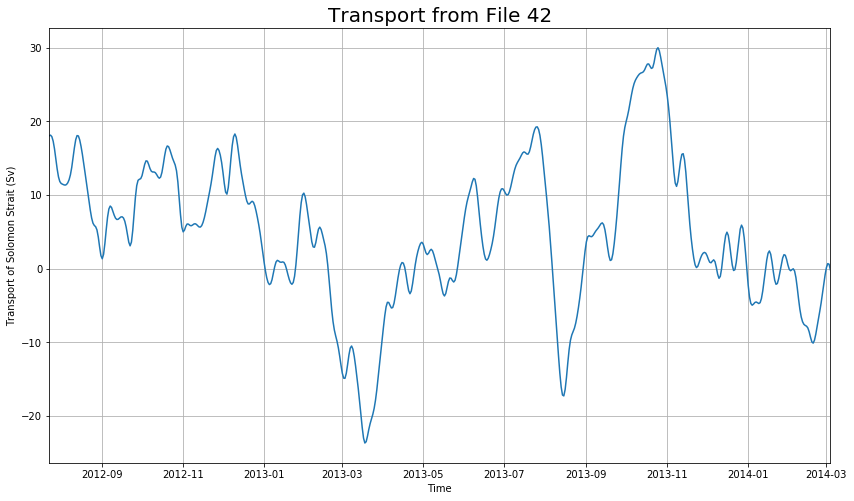

In [14]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport of Solomon Strait (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, x['T'][42])
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
plt.title('Transport from File 42', fontsize=20)
plt.show()

### d. all together

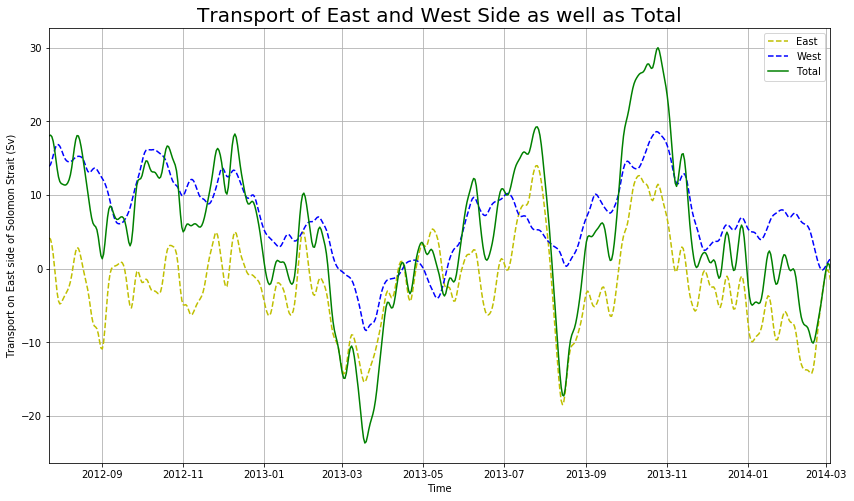

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport on East side of Solomon Strait (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, x['T_E'][42], 'y--', label='East')
ax.plot(py_dt, x['T_W'][42], 'b--', label='West')
ax.plot(py_dt, x['T'][42], 'g', label='Total')
ax.set_xlim(py_dt[0], py_dt[-1])
ax.legend()
ax.grid(True)
plt.title('Transport of East and West Side as well as Total', fontsize=20)
plt.show()

## 4. Adding east and west to see if it matches total

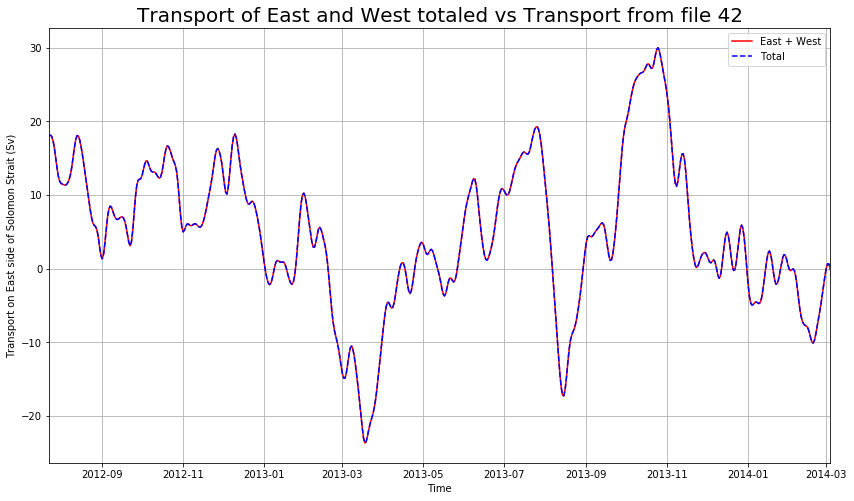

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport on East side of Solomon Strait (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, x['T_E'][42]+x['T_W'][42], 'r', label='East + West')
ax.plot(py_dt, x['T'][42], 'b--', label='Total')
ax.set_xlim(py_dt[0], py_dt[-1])
ax.legend()
ax.grid(True)
plt.title('Transport of East and West totaled vs Transport from file 42', fontsize=20)
plt.show()